# Library for neural networks

Feedforward neural networks for supervised learning

## Imports

In [39]:
from library.classes import Neuron, Layer, Network_Model
from library import helpers as hlp
import color_helpers as chlp
import pandas as pd
import matplotlib.pyplot as plt

## Preprocess input data

The `pandas`-Library is used to preprocess input data.
Firstly, data is read from an Excel-file.

In [40]:
training_orig_df = pd.read_excel('datasets\\rgb.xlsx')
training_orig_df

,Name,R,G,B,Beige,Yellow,Orange,Red,Purple,Blue,Green,Grey,Brown,White,Black
0,Beige,138,102,66,1,0,0,0,0,0,0,0,0,0,0
1,Beige,169,131,7,1,0,0,0,0,0,0,0,0,0,0
2,Beige,190,189,127,1,0,0,0,0,0,0,0,0,0,0
3,Beige,194,176,120,1,0,0,0,0,0,0,0,0,0,0
4,Beige,198,166,100,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,Yellow,244,169,0,0,1,0,0,0,0,0,0,0,0,0
209,Yellow,245,208,51,0,1,0,0,0,0,0,0,0,0,0
210,Yellow,248,243,53,0,1,0,0,0,0,0,0,0,0,0
211,Yellow,250,210,1,0,1,0,0,0,0,0,0,0,0,0


In [41]:
training_df = training_orig_df.copy()
training_df.drop(columns=['Name'], inplace=True)

The data is then split into training and validation data using the `split_training_val_data()` function. Here a percentage can be set.

In [42]:
train_df, val_df = hlp.split_training_val_data(training_df, 0.2)

The training and validation data are then split into input and output data using the `split_input_output_data()` function. The column headers of the training input have to specified.

In [43]:
x_columns = ['R', 'G', 'B']
y_columns = ['Beige', 'Yellow', 'Orange', 'Red', 'Purple', 'Blue', 'Green', 'Grey', 'Brown', 'White', 'Black']

train_df_x, train_df_y = hlp.split_input_output_data(train_df, x_columns, y_columns)
val_df_x, val_df_y = hlp.split_input_output_data(val_df, x_columns, y_columns)

In [44]:
train_df_x_norm = hlp.normalize(train_df_x, 0, 255, -1, 1)
val_df_x_norm = hlp.normalize(val_df_x, 0, 255, -1, 1)

In [45]:
train_df_x_norm

,R,G,B
0,0.082353,-0.200000,-0.482353
1,0.325490,0.027451,-0.945098
2,0.490196,0.482353,-0.003922
3,0.521569,0.380392,-0.058824
4,0.552941,0.301961,-0.215686
...,...,...,...
165,0.905882,0.294118,-0.960784
166,0.921569,0.631373,-0.600000
167,0.945098,0.905882,-0.584314
168,0.960784,0.647059,-0.992157


## Instanciate a model

`add_layer` adds a new layer to the model. The amount of neurons and the desired activation function can be set. Layer 0 is automatically set to be the input layer. Weights and biases are randomly assigned.

In [46]:
mdl = Network_Model()
mdl.add_layer(3)
mdl.add_layer(16, activation_function='sigmoid')
mdl.add_layer(11, activation_function='sigmoid')

Using `plot_network`, the Model can be visualized.

In [47]:
mdl.plot_network()

<div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(0, 1)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(0, 2)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(0, 3)<br>net 0<br>act 0<br>out 0</div>

<div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(1, 1)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(1, 2)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(1, 3)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(1, 4)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(1, 5)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(1, 6)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(1, 7)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(1, 8)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(1, 9)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(1, 10)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(1, 11)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(1, 12)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(1, 13)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(1, 14)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(1, 15)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(1, 16)<br>net 0<br>act 0<br>out 0</div>

<div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(2, 1)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(2, 2)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(2, 3)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(2, 4)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(2, 5)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(2, 6)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(2, 7)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(2, 8)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(2, 9)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(2, 10)<br>net 0<br>act 0<br>out 0</div><div style="border-style:outset; border-radius: 1ex; border-color: white; padding: 0.5ex; text-align: center; float: left; margin: 0.25ex; width: fit-content">(2, 11)<br>net 0<br>act 0<br>out 0</div>

Using `get_weights()`, the weights can be displayed. Weihts of row 0 are weights of the bias neuron of the respective layer.

In [48]:
mdl.layers[1].get_weights()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.127929,-0.639153,0.406130,-0.607409,-0.023658,0.244866,0.490637,-0.237952,0.853023,0.093851,0.418644,-0.619633,0.897247,0.340920,0.006154,0.296621
1,-0.883678,0.258304,-0.538809,-0.803474,0.765731,-0.268187,-0.791403,0.412262,-0.823369,-0.982928,-0.811668,0.359352,-0.875989,0.724655,0.267264,-0.963081
2,0.412136,0.575245,0.757006,0.889461,0.068330,0.060549,-0.966477,0.870521,-0.846046,0.291246,-0.673363,0.060533,0.224243,0.665015,-0.259975,-0.964527
3,-0.949855,0.580720,0.563331,-0.162586,0.034416,0.116837,0.539728,-0.212866,0.365191,0.768439,0.742065,0.145661,-0.829308,0.519653,-0.998854,0.231060


Using the `predict()` method, a prediction is made based on a given input-vector. Since the model is not trained yet, the output is random.

In [49]:
rgb = [255, 0, 0]
input = chlp.rgb_to_norm(rgb)
pred = mdl.predict(input)
print(y_columns[pred.index(max(pred))])
chlp.plot_color(input)

Beige


<div style="height: 100px; width: 100px; background-color: rgb(255.0,0.0,0.0);"></div>

## Training the model

Using *backpropagation of error* the model can be trained. As input the previously normalized data is used. Teaching input is also needed.

In [56]:
history = mdl.train(train_df_x_norm, train_df_y, epochs=100, debug=False, learning_rate=0.5)

#### Learning curve

The cumulative error over time can be plotted

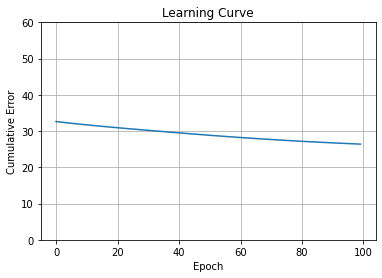

In [57]:
fig, ax = plt.subplots()
ax.plot(history)
ax.set(xlabel='Epoch', ylabel='Cumulative Error',title='Learning Curve')
ax.grid()
plt.ylim([0,60])
plt.show()

#### Prediction

Using the trained model, more accurate predictions can now be made.

In [58]:
rgb = [0, 255, 127] # https://www.w3schools.com/colors/colors_rgb.asp
input = chlp.rgb_to_norm(rgb)
pred = mdl.predict(input)
print(y_columns[pred.index(max(pred))])
chlp.plot_color(input)

# 'Beige', 'Yellow', 'Orange', 'Red', 'Purple', 'Blue', 'Green', 'Grey', 'Brown', 'White', 'Black'

Green


<div style="height: 100px; width: 100px; background-color: rgb(0.0,255.0,127.5);"></div>

In [53]:
mdl.layers[1].get_weights()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.809415,-0.658477,2.402711,-2.428942,-1.411486,3.079112,-0.953249,-0.662644,-0.630900,-0.675118,-0.427925,-3.349459,1.414740,1.909207,-2.165325,-0.682111
1,-0.050222,-0.334708,0.332181,3.145647,4.495643,-3.669847,-2.352600,-0.869921,-5.402888,-6.348719,0.961039,4.595420,0.492957,3.780263,6.950981,-0.300108
2,3.093357,6.143979,1.226011,3.812742,-3.250593,-0.992152,-2.131198,3.466821,2.584871,6.584630,-5.296531,-1.080125,5.423703,-1.256037,-1.773723,-1.241851
3,-3.277960,-0.178145,4.560482,-2.876167,0.222633,-0.463406,5.243567,-1.444046,2.539932,-0.369347,4.311835,-1.417031,-2.619763,3.982301,-4.099798,4.283276
